# <span style="color:#756bb1">Potenza del Test</span>

## <span style="color:#e6550d">Test Unidirezionale a Sinistra per la MEDIA</span>

Valore critico: 53.23364 


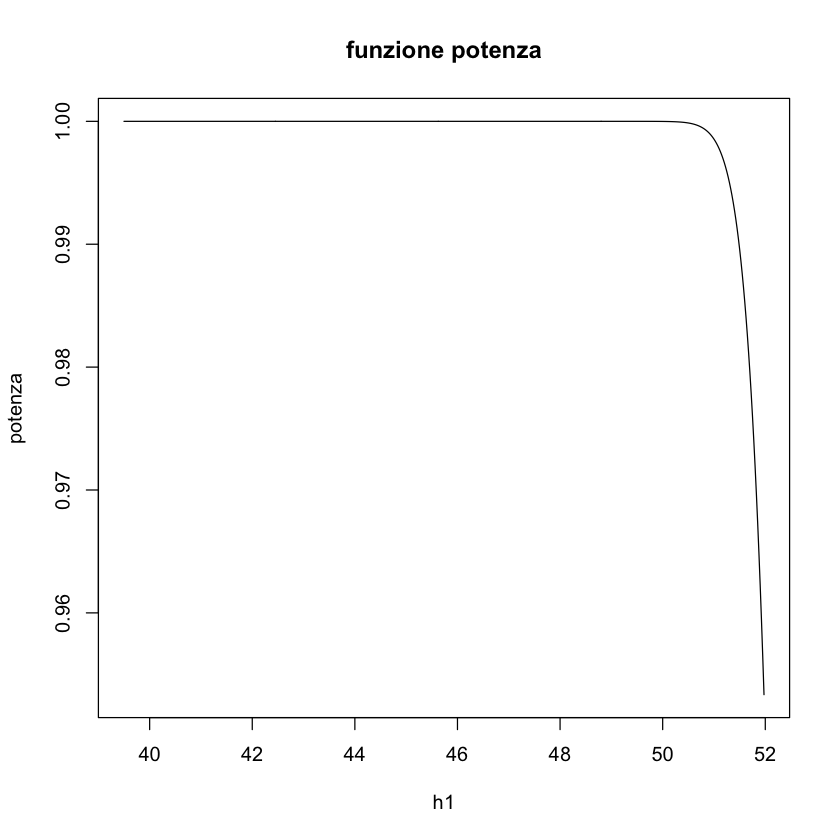

In [7]:
# Test unidirezionale a sinistra
# H0 : mu = 52
# H1 : mu < 52

m0 <- 52 
n <- 64 

# vettore dei possibili parametri sotto H1
h1_true <- seq(m0 - 0.025, m0 - (50 * .25), by = - 0.025)
sigma <- 6
alpha <- .05

z_alpha <- qnorm(alpha) # mi serve per definire il valore critico
x_crit <- m0 - z_alpha * sigma / sqrt(n)
cat("Valore critico:", x_crit, "\n")

beta <- rep(0, length(h1_true))
for (i in 1 : length(h1_true)) {
  beta[i] <- 1 - pnorm((x_crit - h1_true[i]) / (sigma / sqrt(n)))
}
potenza <- 1 - beta
# cat("Potenza del test:", potenza)

par(bg = "white")
plot(h1_true, potenza, 
    type = "l", 
    xlab = "h1", 
    ylab = "potenza", 
    main = "funzione potenza")

## <span style="color:#e6550d">Test Unidirezionale a Destra per la MEDIA</span>

Valore critico: 53.23364 


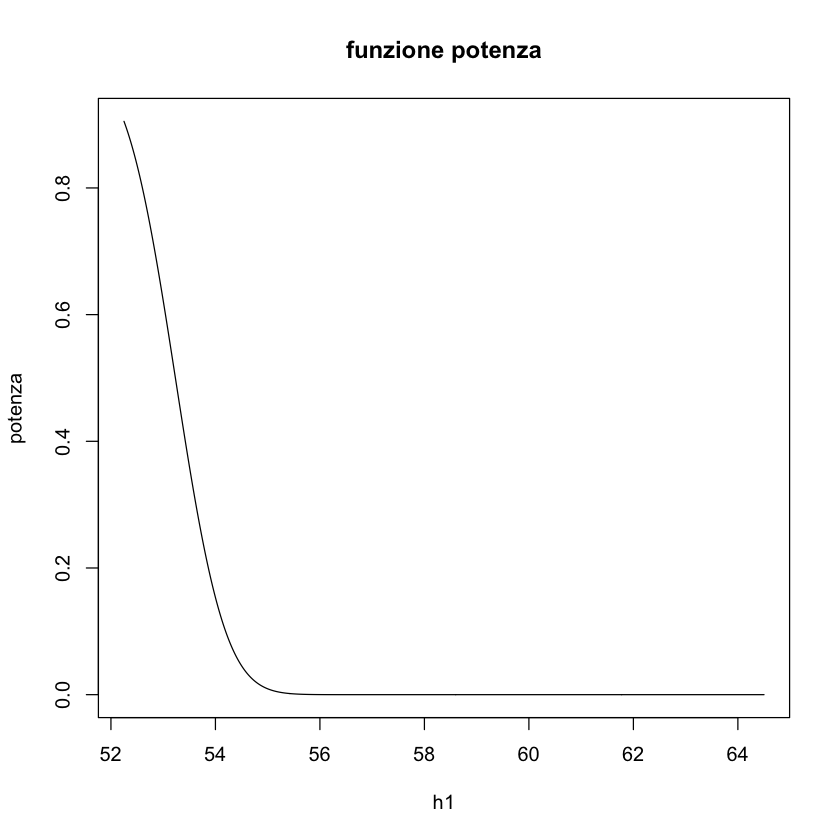

In [2]:
# test uni-direzionale a destra
# H0: mu = 52
# H1: mu > 52

m0 <- 52
n <- 64 
h1_true <- seq(m0 + 0.25, m0 + (50 * .25), by = 0.025)
varianza <- 6^2
alpha <- .05

z_alpha <- qnorm(1 - alpha) 
x_crit <- m0 + (z_alpha * sqrt(varianza) / sqrt(n))
cat("Valore critico:", x_crit, "\n")

beta <- rep(0, length(h1_true))
for (i in 1 : length(h1_true)) {
  beta[i] <- 1 - pnorm((x_crit - h1_true[i]) / (sigma / sqrt(n)))
}
potenza <- 1 - beta

par(bg = "white")
plot(h1_true, potenza, 
  type = "l", 
  xlab = "h1", 
  ylab = "potenza", 
  main = "funzione potenza")

# Per tutti i valori della media campionaria che sono minori del valore critico,
# non rifiuto H0.
# Per tutti i valori della media campionaria che sono maggiori del valore critico,
# rifiuto H0.

## <span style="color:#e6550d">Test Bi-Direzionale per la MEDIA</span>

Valori critici: 50.53003 53.46997 


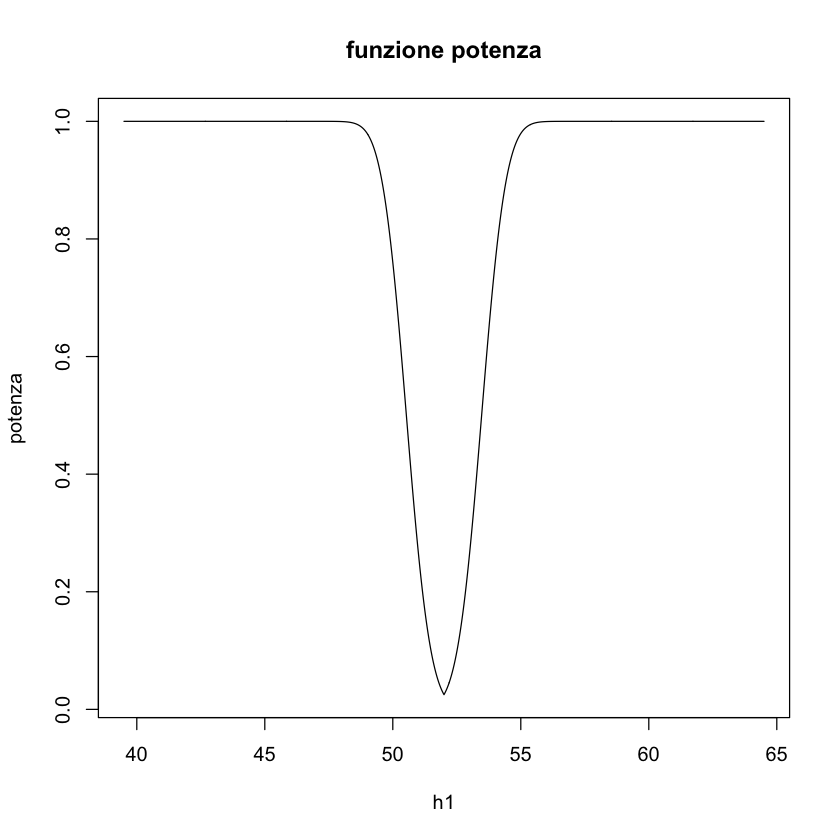

In [3]:
# test bi-direzionale
# H0: mu = 52
# H1: mu != 52

m0 <- 52
n <- 64
h1_true <- seq(m0 - (50 * .25), m0 + (50 * .25), by = 0.025)

varianza <- 6^2
alpha <- .05
alpha2 <- alpha / 2

z_alpha <- abs(qnorm(alpha))
z_alpha2 <- abs(qnorm(alpha2))

x_crit1 <- m0 - (z_alpha2 * sigma / sqrt(n))
x_crit2 <- m0 + (z_alpha2 * sigma / sqrt(n))
x_crit <- m0 + (z_alpha * sigma / sqrt(n))
cat("Valori critici:", x_crit1, x_crit2, "\n")

beta <- rep(0, length(h1_true))
for (i in 1 : length(h1_true)) {
  if(h1_true[i] <= m0) {
    beta[i] <- 1 - pnorm((x_crit1 - h1_true[i]) / (sigma / sqrt(n)))
  } else {
    beta[i] <- pnorm((x_crit2 - h1_true[i]) / (sigma / sqrt(n)))
  }
}
potenza <- 1 - beta

par(bg = "white")
plot(h1_true, potenza, 
    type = "l", 
    xlab = "h1", 
    ylab = "potenza", 
    main = "funzione potenza")

### <span style="color:#e6550d">Explanation of how to achieve the results</span>

Warning message in geom_ribbon(aes(x = z_scores, ymax = density_h0, ymin = 0), fill = "red", :
"Ignoring unknown parameters: `xlim` and `ylim`"
Warning message in geom_ribbon(aes(x = z_scores, ymax = density_h0, ymin = 0), fill = "red", :
"Ignoring unknown parameters: `xlim` and `ylim`"
Warning message in geom_ribbon(aes(x = z_scores, ymax = density_h1, ymin = 0), fill = "blue", :
"Ignoring unknown parameters: `xlim` and `ylim`"


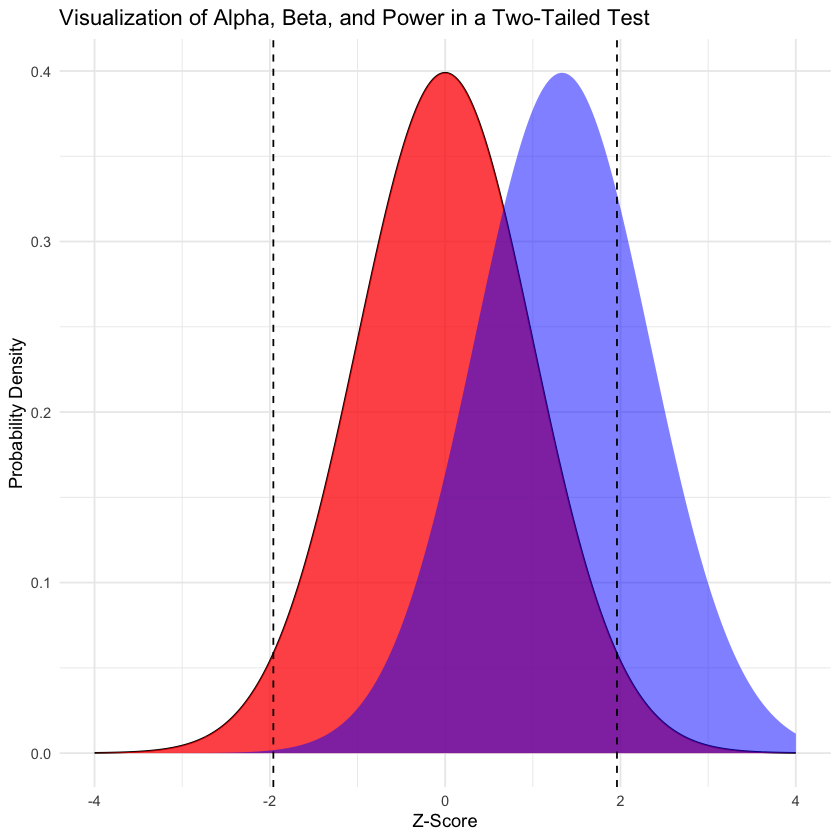

In [4]:
# Load necessary library
library(ggplot2)

# Parameters
m0 <- 52
n <- 64
sigma <- 6
alpha <- 0.05
alt_mean <- 53  # Example mean under H1

# Critical z-values
z_alpha2 <- qnorm(alpha / 2)
z_alpha2_pos <- qnorm(1 - (alpha / 2))

# Z-scores for the hypothesized mean and the alternative mean
z_h0 <- (m0 - m0) / (sigma / sqrt(n))
z_h1 <- (alt_mean - m0) / (sigma / sqrt(n))

# Creating a sequence of z-scores for the plot
z_scores <- seq(-4, 4, by = 0.01)
density_h0 <- dnorm(z_scores)
density_h1 <- dnorm(z_scores, mean = z_h1)

# Creating the plot
ggplot() +
  geom_line(aes(x = z_scores, y = density_h0), color = "black") +
  geom_ribbon(aes(x = z_scores, ymax = density_h0, ymin = 0), 
              fill = "red", alpha = 0.5, 
              xlim = c(-Inf, z_alpha2), ylim = c(0, max(density_h0))) +
  geom_ribbon(aes(x = z_scores, ymax = density_h0, ymin = 0), 
              fill = "red", alpha = 0.5, 
              xlim = c(z_alpha2_pos, Inf), ylim = c(0, max(density_h0))) +
  geom_ribbon(aes(x = z_scores, ymax = density_h1, ymin = 0), 
              fill = "blue", alpha = 0.5, 
              xlim = c(z_alpha2, z_alpha2_pos), ylim = c(0, max(density_h0))) +
  geom_vline(xintercept = z_alpha2, linetype = "dashed", color = "black") +
  geom_vline(xintercept = z_alpha2_pos, linetype = "dashed", color = "black") +
  labs(title = "Visualization of Alpha, Beta, and Power in a Two-Tailed Test",
       x = "Z-Score", y = "Probability Density") +
  theme_minimal()


## <span style="color:#e6550d">Funzione per il calcolo della Potenza del Test</span>
Scrivere una funzione generica che calcola e rappresenta le funzioni potenza del test per un test sulla media di una popolazione normale con varianza nota

![Screenshot 2024-01-09 at 16.09.44.png](<attachment:Screenshot 2024-01-09 at 16.09.44.png>) ![Screenshot 2024-01-09 at 16.10.02.png](<attachment:Screenshot 2024-01-09 at 16.10.02.png>)
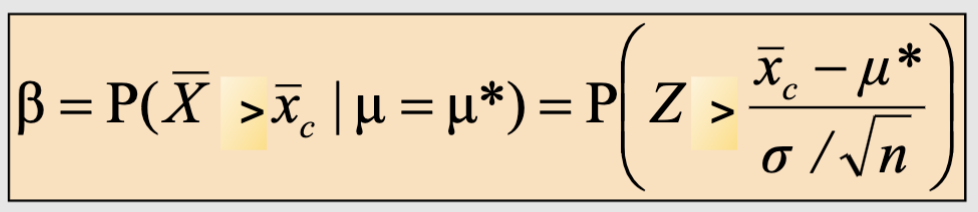
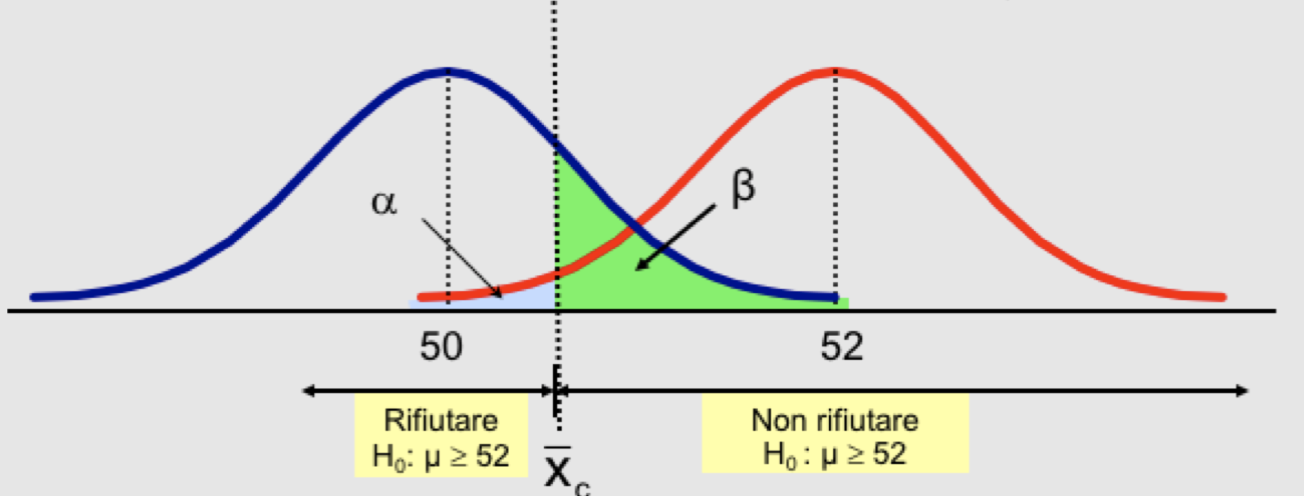

In [4]:
# Funzione per il calcolo della potenza del test con distribuzione normale e scelta del tipo di test, 
# bilaterale, uni-laterale a sinistra o uni-laterale a destra
calcola_potenza_test_normale <- function(media_nulla, media_reale, sd, dimensione_campione, alpha, tipo_test) {
  # Calcolo del valore critico Z
  if (tipo_test == "bilaterale") {
    z_critico <- qnorm(1 - (alpha / 2))
    cat("Valori critici:", - z_critico, z_critico,"\n")
  } else if (tipo_test == "unilaterale_sinistra") {
    z_critico <- qnorm(1 - alpha)
    cat("Valore critico:", z_critico, "\n")
  } else if (tipo_test == "unilaterale_destra") {
    z_critico <- qnorm(alpha)
    cat("Valore critico:", z_critico, "\n")
  } else {
    print("Tipo di test non valido")
    return(0)
  }

  # Calcolo del valore Z per l'ipotesi alternativa
  z <- (media_reale - media_nulla) / (sd / sqrt(dimensione_campione)) # beta
  cat("Valore Z per l'ipotesi alternativa:", z, "\n")

  # Calcolo della potenza del test
  if (tipo_test == "bilaterale") {
    potenza <- 1 - pnorm(z_critico - z) + pnorm(-z_critico - z)
  } else if (tipo_test == "unilaterale_sinistra") {
    potenza <- 1 - pnorm(z_critico - z)
  } else if (tipo_test == "unilaterale_destra") {
    potenza <- pnorm(z_critico - z)
  }

  return(potenza)
}

# Esempio di utilizzo della funzione
# Parametri:
# media_nulla = 50, (mu*)
# media_reale = 52, (mu)
# sd = 6, 
# dimensione_campione = 30, 
# alpha = 0.05, 
# tipo_test = "bilaterale", "unilaterale_sinistra", "unilaterale_destra"
esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "bilaterale")
cat("Potenza del test (Bilaterale):", esempio_potenza, "\n")

esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "unilaterale_sinistra")
cat("Potenza del test (Unilaterale a sinistra):", esempio_potenza, "\n")

esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "unilaterale_destra")
cat("Potenza del test (Unilaterale a destra):", esempio_potenza, "\n")


Valori critici: -1.959964 1.959964 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test (Bilaterale): 0.7601262 
Valore critico: 1.644854 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test (Unilaterale a sinistra): 0.8465653 
Valore critico: -1.644854 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test (Unilaterale a destra): 8.106795e-06 


Valori critici: -1.959964 e 1.959964 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test: 0.7601262 
Valore critico: -1.644854 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test: 8.106795e-06 


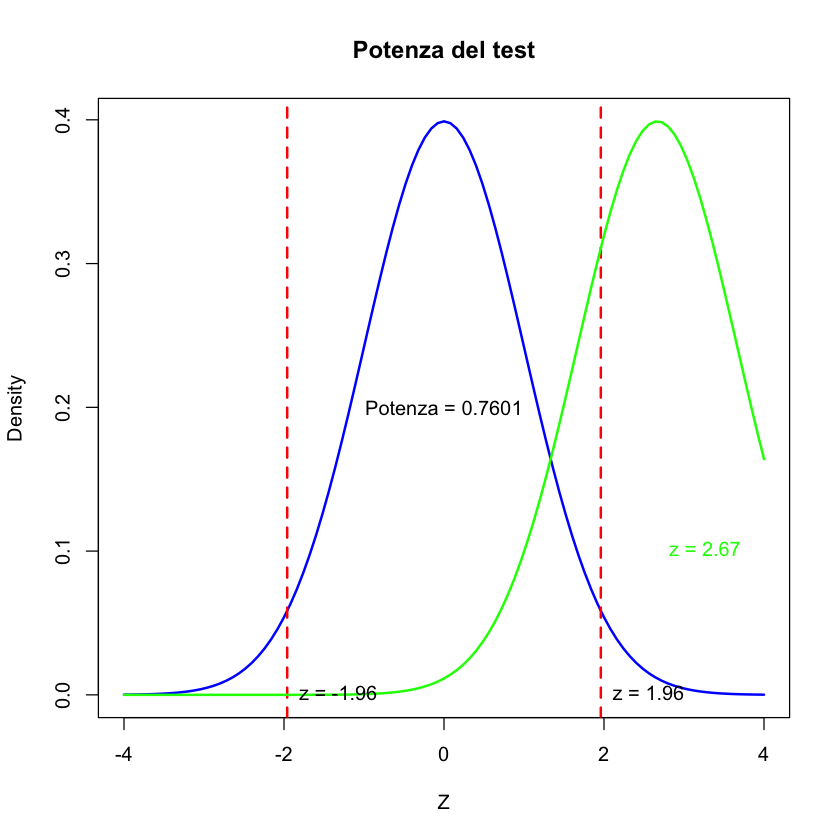

Valore critico: 1.644854 
Valore Z per l'ipotesi alternativa: 2.666667 
Potenza del test: 0.8465653 


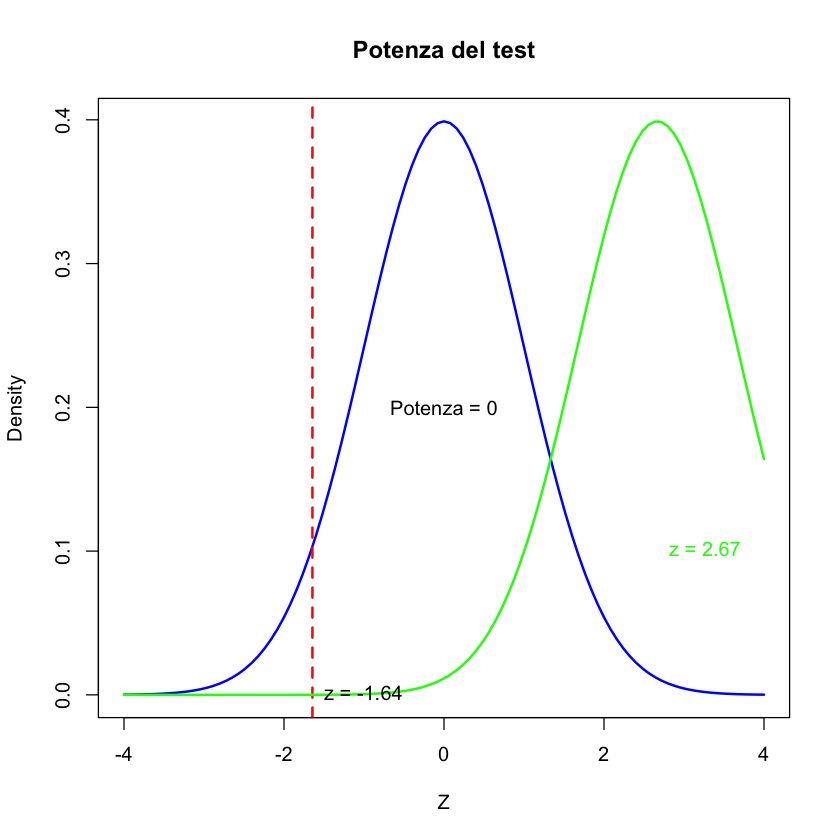

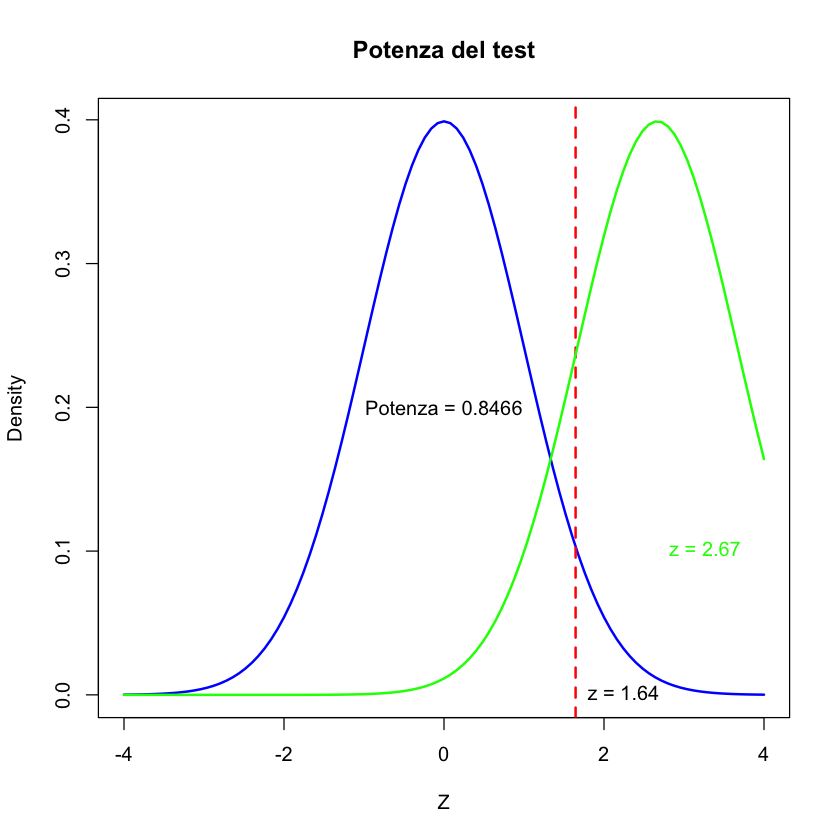

In [12]:
calcola_potenza_test_normale <- function(media_nulla, media_reale, sd, dimensione_campione, alpha, tipo_test) {
  # Calcolo del valore critico Z
  if (tipo_test == "bilaterale") {
    z_critico <- qnorm(1 - (alpha / 2))
    cat("Valori critici:", -z_critico, "e", z_critico, "\n")
  } else if (tipo_test == "unilaterale_sinistra") {
    z_critico <- qnorm(alpha)
    cat("Valore critico:", z_critico, "\n")
  } else if (tipo_test == "unilaterale_destra") {
    z_critico <- qnorm(1 - alpha)
    cat("Valore critico:", z_critico, "\n")
  } else {
    stop("Tipo di test non valido")
  }

  # Calcolo del valore Z per l'ipotesi alternativa
  z <- (media_reale - media_nulla) / (sd / sqrt(dimensione_campione))
  cat("Valore Z per l'ipotesi alternativa:", z, "\n")

  # Calcolo della potenza del test
  potenza <- if (tipo_test == "bilaterale") {
    1 - pnorm(z_critico - z) + pnorm(-z_critico - z)
  } else if (tipo_test == "unilaterale_sinistra") {
    pnorm(z_critico - z)
  } else if (tipo_test == "unilaterale_destra") {
    1 - pnorm(z_critico - z)
  }
  cat("Potenza del test:", potenza, "\n")
  
  # Plot the distribution of Z under H0 and H1
  par(bg = "white")
  curve(dnorm(x), from = -4, to = 4, col = 'blue', lwd = 2, ylab = 'Density', xlab = 'Z', main = 'Potenza del test')
  abline(v = z_critico, col = 'red', lwd = 2, lty = 2)
  if (tipo_test == "bilaterale") {
    abline(v = -z_critico, col = 'red', lwd = 2, lty = 2)
  }
  curve(dnorm(x, mean = z), from = -4, to = 4, col = 'green', lwd = 2, add = TRUE)
  
  # Add labels
  text(z_critico, 0, paste("z =", round(z_critico, 2)), pos = 4)
  if (tipo_test == "bilaterale") {
    text(-z_critico, 0, paste("z =", round(-z_critico, 2)), pos = 4)
  }
  text(z, 0.1, paste("z =", round(z, 2)), pos = 4, col = 'green')

  # Print the power on the plot
  text(0, 0.2, paste("Potenza =", round(potenza, 4)), col = 'black')

  return(potenza)
}

# Esempio di utilizzo della funzione
esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "bilaterale")

esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "unilaterale_sinistra")

esempio_potenza <- calcola_potenza_test_normale(50, 52, 6, 64, 0.05, "unilaterale_destra")